\hfill Department of Statistics

\hfill Jaeyeong Kim, Alex Ruiz

## Define Functions

In [14]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def costfunction(X, Y, w, lamb):
    m = X.shape[0]
    z = np.dot(X,w)
    h = sigmoid(z)
    X = np.array(X)
    Y = np.array(Y)
    
    cost = -1/m * (np.dot(Y.T, np.log(h)) + np.dot((1-Y.T), np.log(1-h)))\
            + lamb/(2*m) * np.dot(w.T, w)
    grad =  1/m * (np.dot(X.T, h-Y)) + lamb / m * w

    return cost, grad

def score(X_train_scaled, X_valid_scaled, Y_train, Y_valid, w):
    #get shapes of the train and the validation data sets
    (m,   n) = X_train.shape
    (m1, n1) = X_valid.shape
    
    #save prediction of Y
    Y_predict_train = np.zeros((m,1))
    Y_predict_valid = np.zeros((m1,1))
        
    # predict Y of the train set and the test set
    h_train = sigmoid(np.dot(X_train_scaled, w))
    h_valid = sigmoid(np.dot(X_valid_scaled, w))
    for j in range(m):
        if h_train[j] >= 0.5:
            Y_predict_train[j] = 1
        else :
            Y_predict_train[j] = 0

    for j in range(m1):
        if h_valid[j] >= 0.5:
            Y_predict_valid[j] = 1
        else :
            Y_predict_valid[j] = 0
            
            
    #calculate prediction scores
    Y_score_train = np.zeros((m,1))
    Y_score_valid = np.zeros((m1,1))
    for j in range(m):
        if Y_predict_train[j] == np.array(Y_train)[j]:
            Y_score_train[j] = 1
        else :
            Y_score_train[j] = 0

    for j in range(m1):
        if Y_predict_valid[j] == np.array(Y_valid)[j]:
            Y_score_valid[j] = 1
        else :
            Y_score_valid[j] = 0
    
    score_train = np.sum(Y_score_train) / m
    score_valid = np.sum(Y_score_valid) / m1

    return score_train, score_valid

def logistic_regression(X_train, X_valid, Y_train, Y_valid, alpha,\
                        lamb, iteration, negetive_value):
    #get shapes of the train and the validation data sets
    m, n = X_train.shape
    
    if negetive_value == -1:
        Y_train = (Y_train + 1)/2
        Y_valid = (Y_valid + 1)/2
    
    #normalize the train and validation data sets.
    X = X_train.append(X_valid)
    X_scaled = preprocessing.scale(X)
    X_train_scaled = X_scaled[:m]
    X_valid_scaled = X_scaled[m:]

    #set w0 = 0
    w = np.zeros((n,1))
    
    #save_values
    cost_result = np.zeros((iteration,2))
    error_result = np.zeros((np.int(iteration/100),3))
    
    for i in range(iteration):
        z = np.dot(X_train_scaled,w)
        h = sigmoid(z)
    
        #calculate cost and graduation and train w
        cost, grad = costfunction(X_train_scaled, Y_train, w, lamb)
        w = w - alpha * grad
    
        cost_result[i] = [i+1, cost]
    
        #calculate error score every 100 iteration
        if (i+1) % 100 == 0:
            score_train, score_valid = score(X_train_scaled, \
                                        X_valid_scaled, Y_train, Y_valid, w)
            k = np.int(i/100)
            error_result[k] = [i+1, 1-score_train, 1-score_valid]
        else:
            pass
    
    return cost_result, error_result

# PART (A) - gisette

In [3]:
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd

# Reading in the GISETTE data set
X_train = pd.read_csv('gisette\gisette_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('gisette\gisette_train.labels', header = None)

X_valid = pd.read_csv('gisette\gisette_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('gisette\gisette_valid.labels', header = None)


# Run logistic regression
cost_result, error_result = logistic_regression(X_train, X_valid,\
                            Y_train, Y_valid, 0.001, 0.001, 1000, -1)

x = pd.DataFrame(data = cost_result, columns = ['iteration', 'cost'])
y = pd.DataFrame(data = error_result, columns = ['iteration',\
                                            'error_train', 'error_valid'])

## Plot the cost function

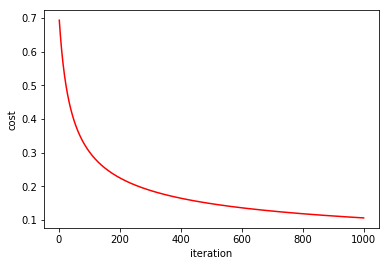

In [5]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(x['iteration'], x['cost'], 'r-')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

We noticed that a small learning rate did not allow the function to converge. We also noticed that while a larger learning rate did monotonically decrease, it learned too quickly. This is why we chose 0.001 as the learning rate.

## Plot the error fuction

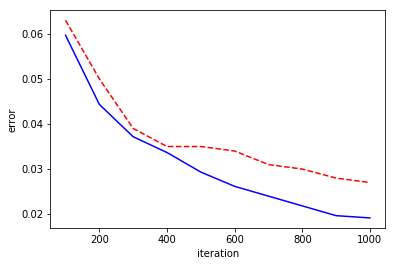

   iteration  error_train  error_valid
0      100.0     0.059667        0.063
1      200.0     0.044333        0.050
2      300.0     0.037167        0.039
3      400.0     0.033667        0.035
4      500.0     0.029333        0.035
5      600.0     0.026167        0.034
6      700.0     0.024000        0.031
7      800.0     0.021833        0.030
8      900.0     0.019667        0.028
9     1000.0     0.019167        0.027


In [6]:
plt.plot(y['iteration'], y['error_train'], 'b-',\
         y['iteration'], y['error_valid'], 'r--')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

print(y)

# Part (B) - madelon

In [7]:
# Reading in the MADELON data set
X_train = pd.read_csv('madelon\madelon_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('madelon\madelon_train.labels', header = None)

X_valid = pd.read_csv('madelon\madelon_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('madelon\madelon_valid.labels', header = None)


# Run logistic regression
# logistic_regression(X_train, X_valid, Y_train, Y_valid, alpha, lamb, iteration, negetive_value)
cost_result, error_result = logistic_regression(X_train, X_valid,\
                            Y_train, Y_valid, 0.03, 0.001, 1000, -1)

x = pd.DataFrame(data = cost_result, columns = ['iteration', 'cost'])
y = pd.DataFrame(data = error_result, columns = ['iteration',\
                                        'error_train', 'error_valid'])

## Plot the cost function

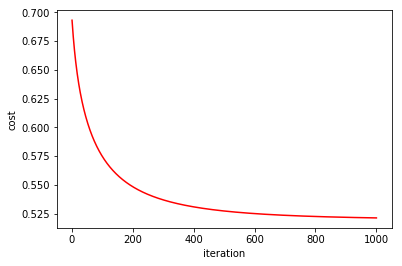

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(x['iteration'], x['cost'], 'r-')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

We noticed that a small learning rate did not allow the function to converge. We also noticed that while a larger learning rate did monotonically decrease, it learned too quickly. This is why we chose 0.03 as the learning rate.

## Plot the error fuction

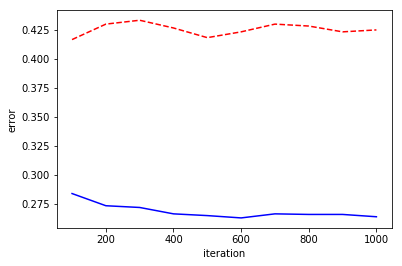

   iteration  error_train  error_valid
0      100.0       0.2840     0.416667
1      200.0       0.2735     0.430000
2      300.0       0.2720     0.433333
3      400.0       0.2665     0.426667
4      500.0       0.2650     0.418333
5      600.0       0.2630     0.423333
6      700.0       0.2665     0.430000
7      800.0       0.2660     0.428333
8      900.0       0.2660     0.423333
9     1000.0       0.2640     0.425000


In [9]:
plt.plot(y['iteration'], y['error_train'], 'b-', \
         y['iteration'], y['error_valid'], 'r--')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

print(y)

# PART (C) - hill-valley

In [10]:
# Reading in the HILLS data set
X_train = pd.read_csv('hill-valley\X.dat', header = None,\
                     delimiter = ' ')
Y_train = pd.read_csv('hill-valley\Y.dat', header = None)

X_valid = pd.read_csv('hill-valley\Xtest.dat', header = None,\
                    delimiter = ' ')
Y_valid = pd.read_csv('hill-valley\Ytest.dat', header = None)


# Run logistic regression
# logistic_regression(X_train, X_valid, Y_train, Y_valid, alpha, lamb, iteration, negetive_value)
cost_result, error_result = logistic_regression(X_train, X_valid,\
                            Y_train, Y_valid, 0.08, 0.001, 10000, 0)

x = pd.DataFrame(data = cost_result, columns = ['iteration', 'cost'])
y = pd.DataFrame(data = error_result, columns = ['iteration', \
                                        'error_train', 'error_valid'])

## Plot the cost function

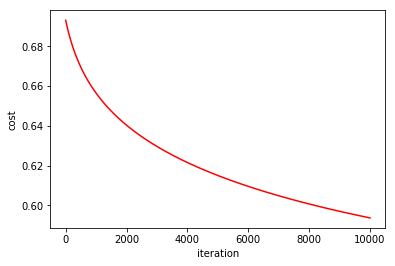

In [11]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(x['iteration'], x['cost'], 'r-')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

With a small learning rate the cost function doesn't converge and with a large learning rate it doesn't monotonically decrease; this is why we chose 0.08 as the learning rate.

## Plot the error fuction

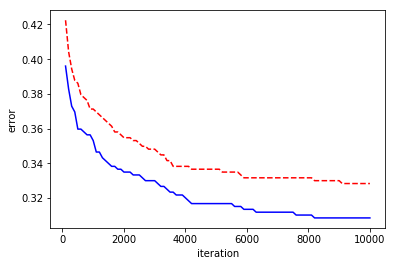

In [18]:
plt.plot(y['iteration'], y['error_train'], 'b-',\
         y['iteration'], y['error_valid'], 'r--')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

#print(y)